In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import tensorflow as tf

# 중간 활성화 시각화

In [2]:
from tensorflow import keras
import numpy as np

img_path = keras.utils.get_file(
    fname="cat.jpg",
    origin="https://img-datasets.s3.amazonaws.com/cat.jpg")

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(
        img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_tensor = get_img_array(img_path, target_size=(180, 180))

In [3]:
model = keras.models.load_model(
    'convert_from_scratch_augmentation.keras')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [4]:
img_path = keras.utils.get_file(
    fname = 'cat.jpg',
    origin = 'https://img-datasets.s3.amazonaws.com/cat.jpg'
    )

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(
        img_path, target_size = target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis = 0)
    return array

img_tensor = get_img_array(img_path, target_size = (180,180))

In [5]:
img_tensor.shape

(1, 180, 180, 3)

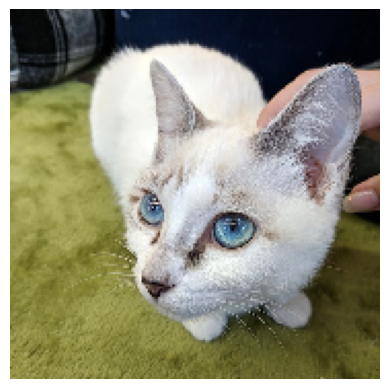

In [6]:
plt.axis('off')
plt.imshow(img_tensor[0].astype('uint8'))
plt.show()

In [7]:
layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs = model.input, outputs = layer_outputs)

In [8]:
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 382ms/step


In [9]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 178, 178, 32)


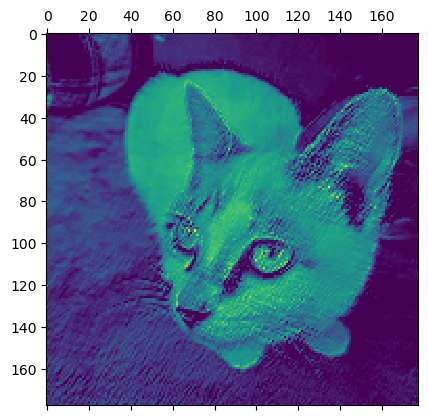

In [12]:
plt.matshow(first_layer_activation[0,:,:,6], cmap = 'viridis')
plt.show()

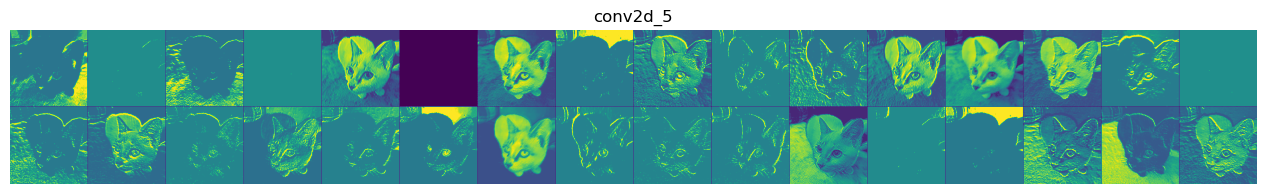

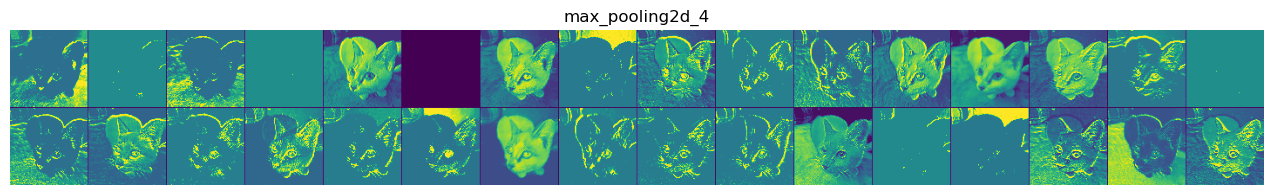

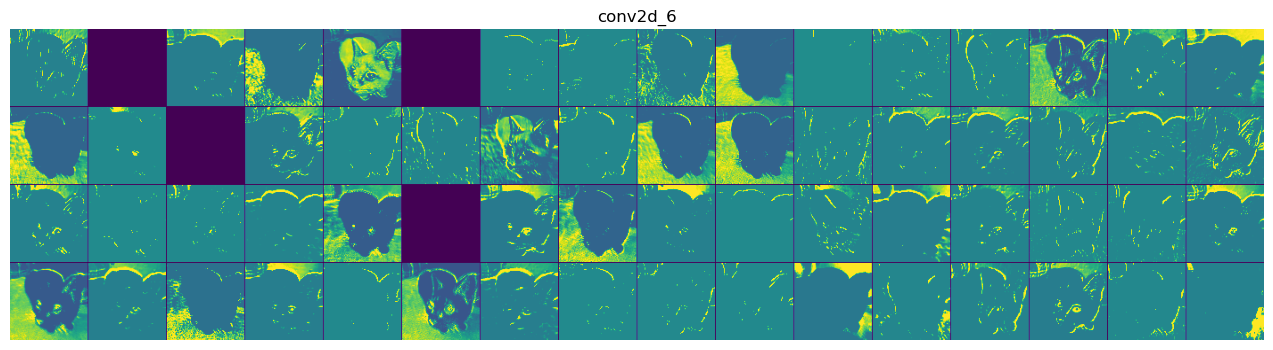

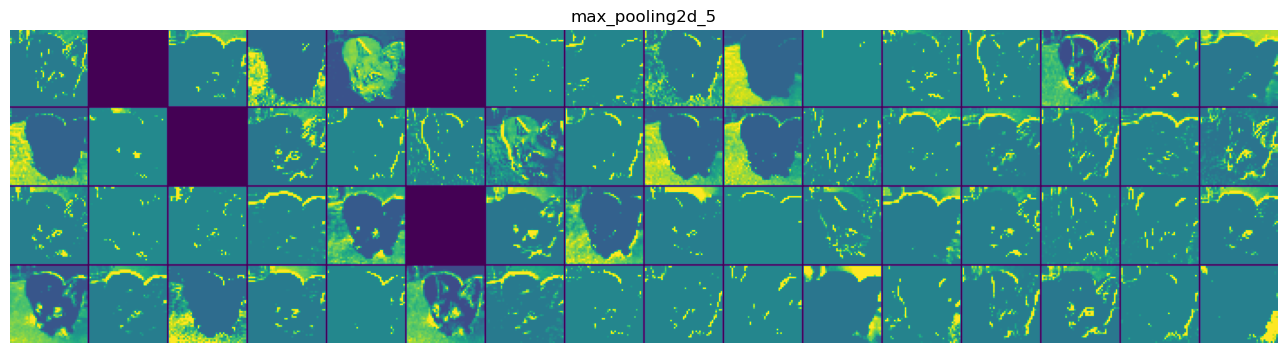

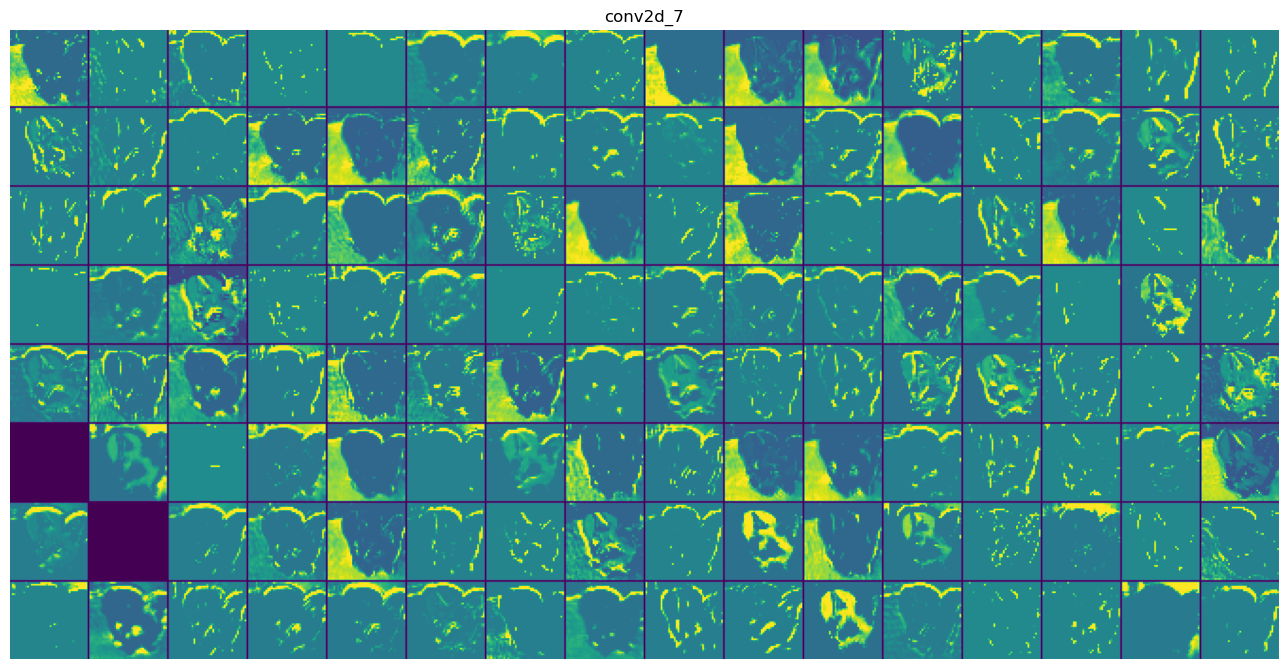

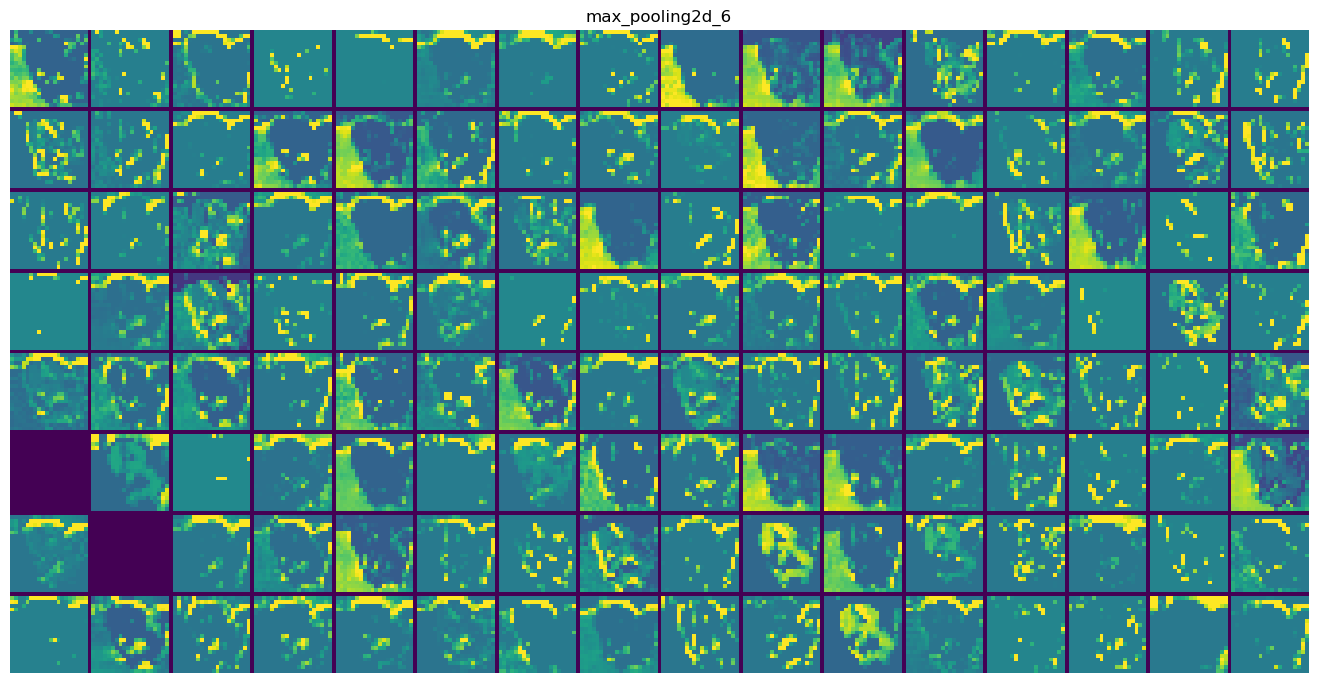

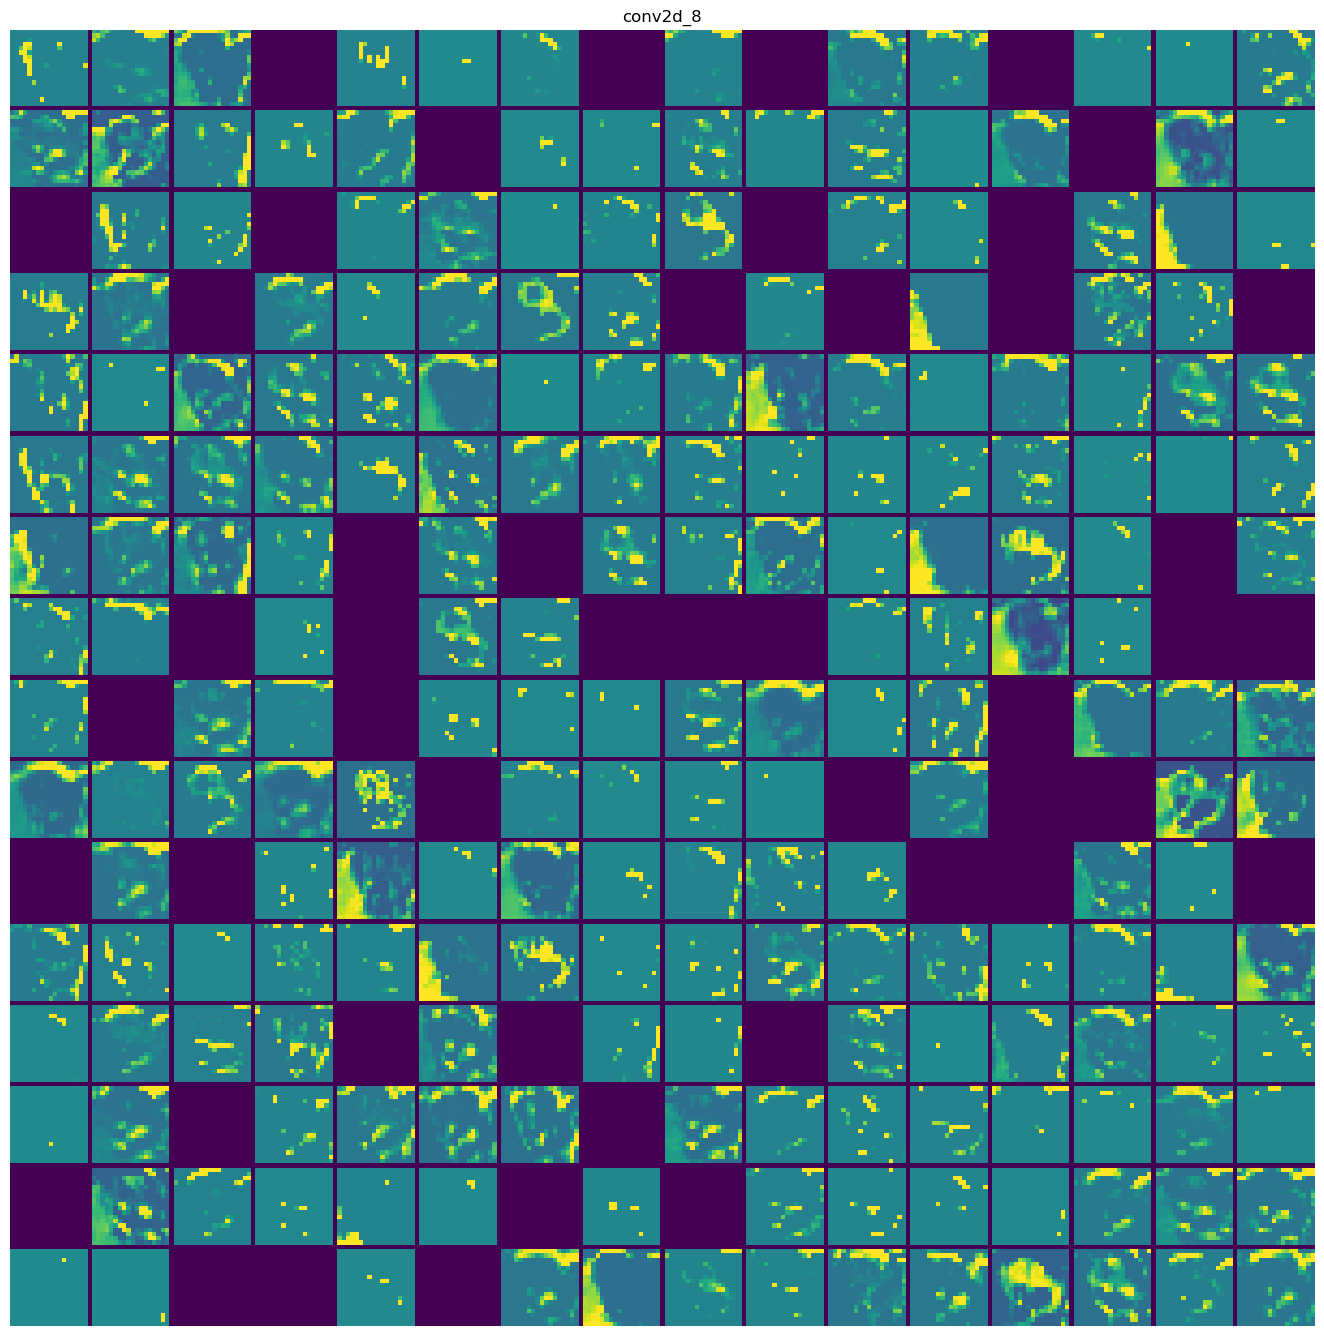

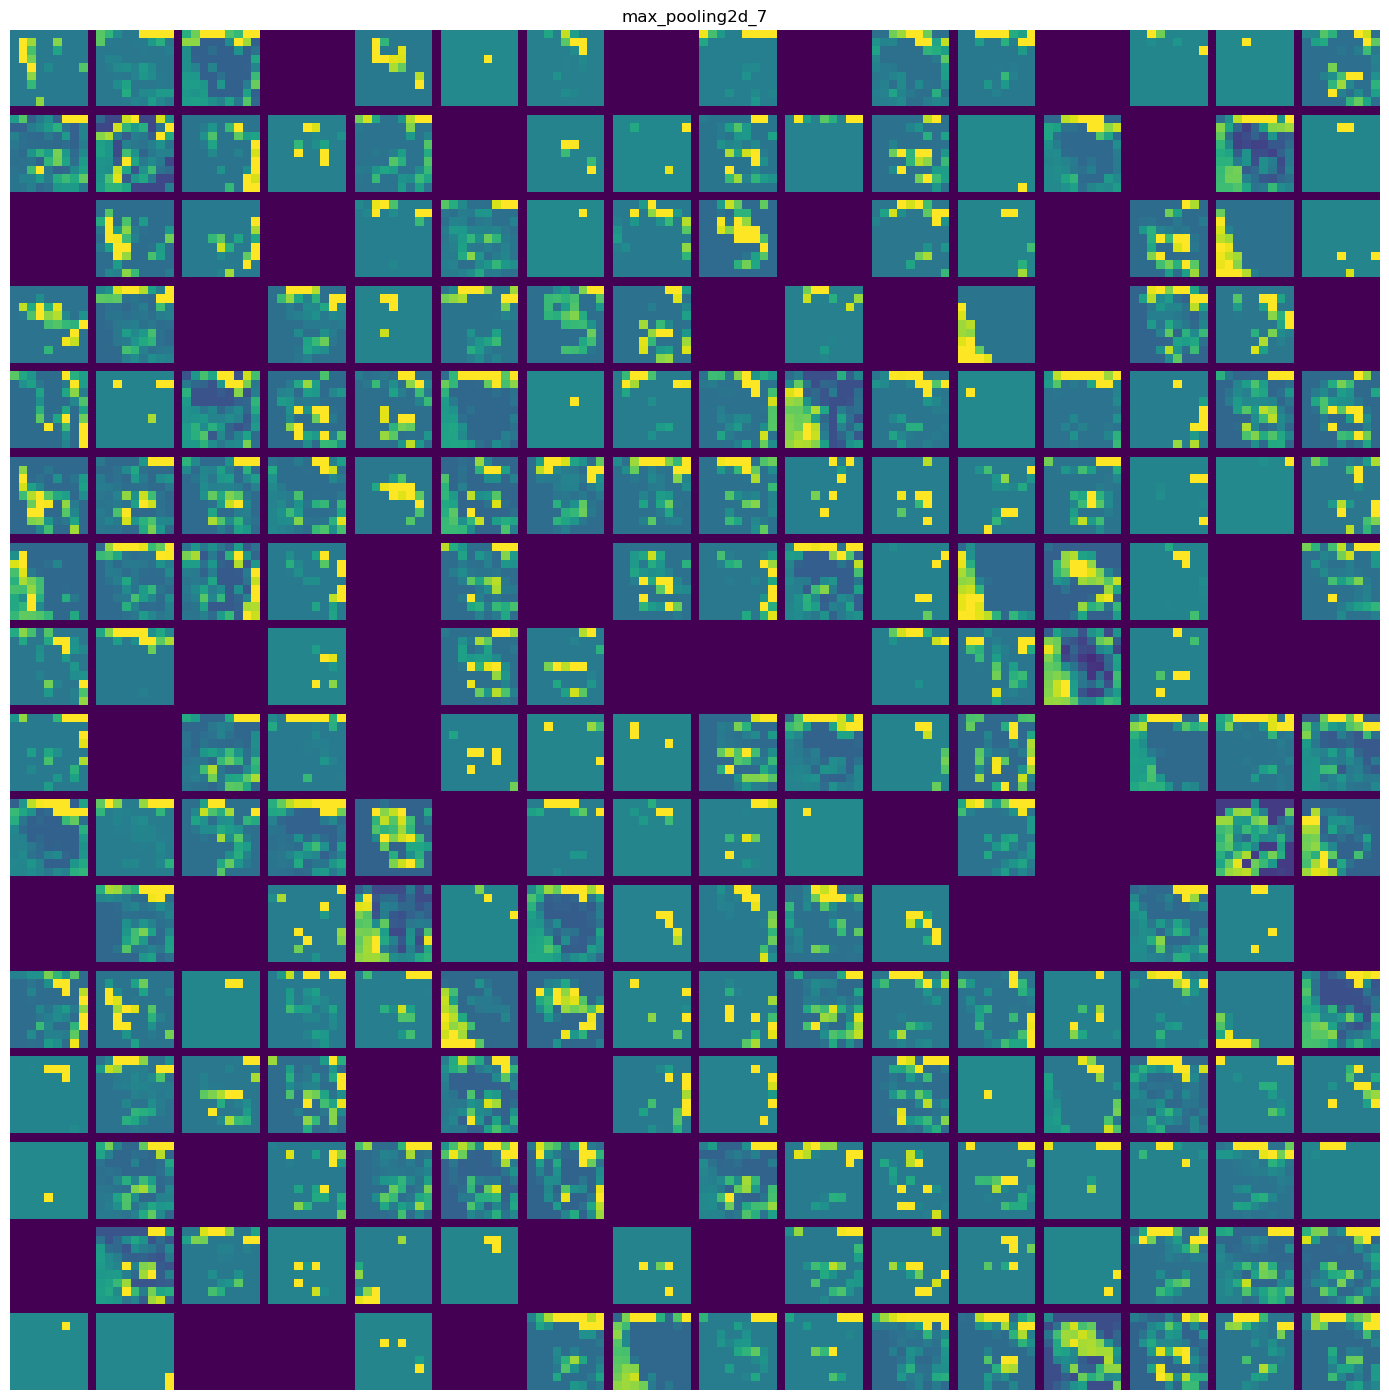

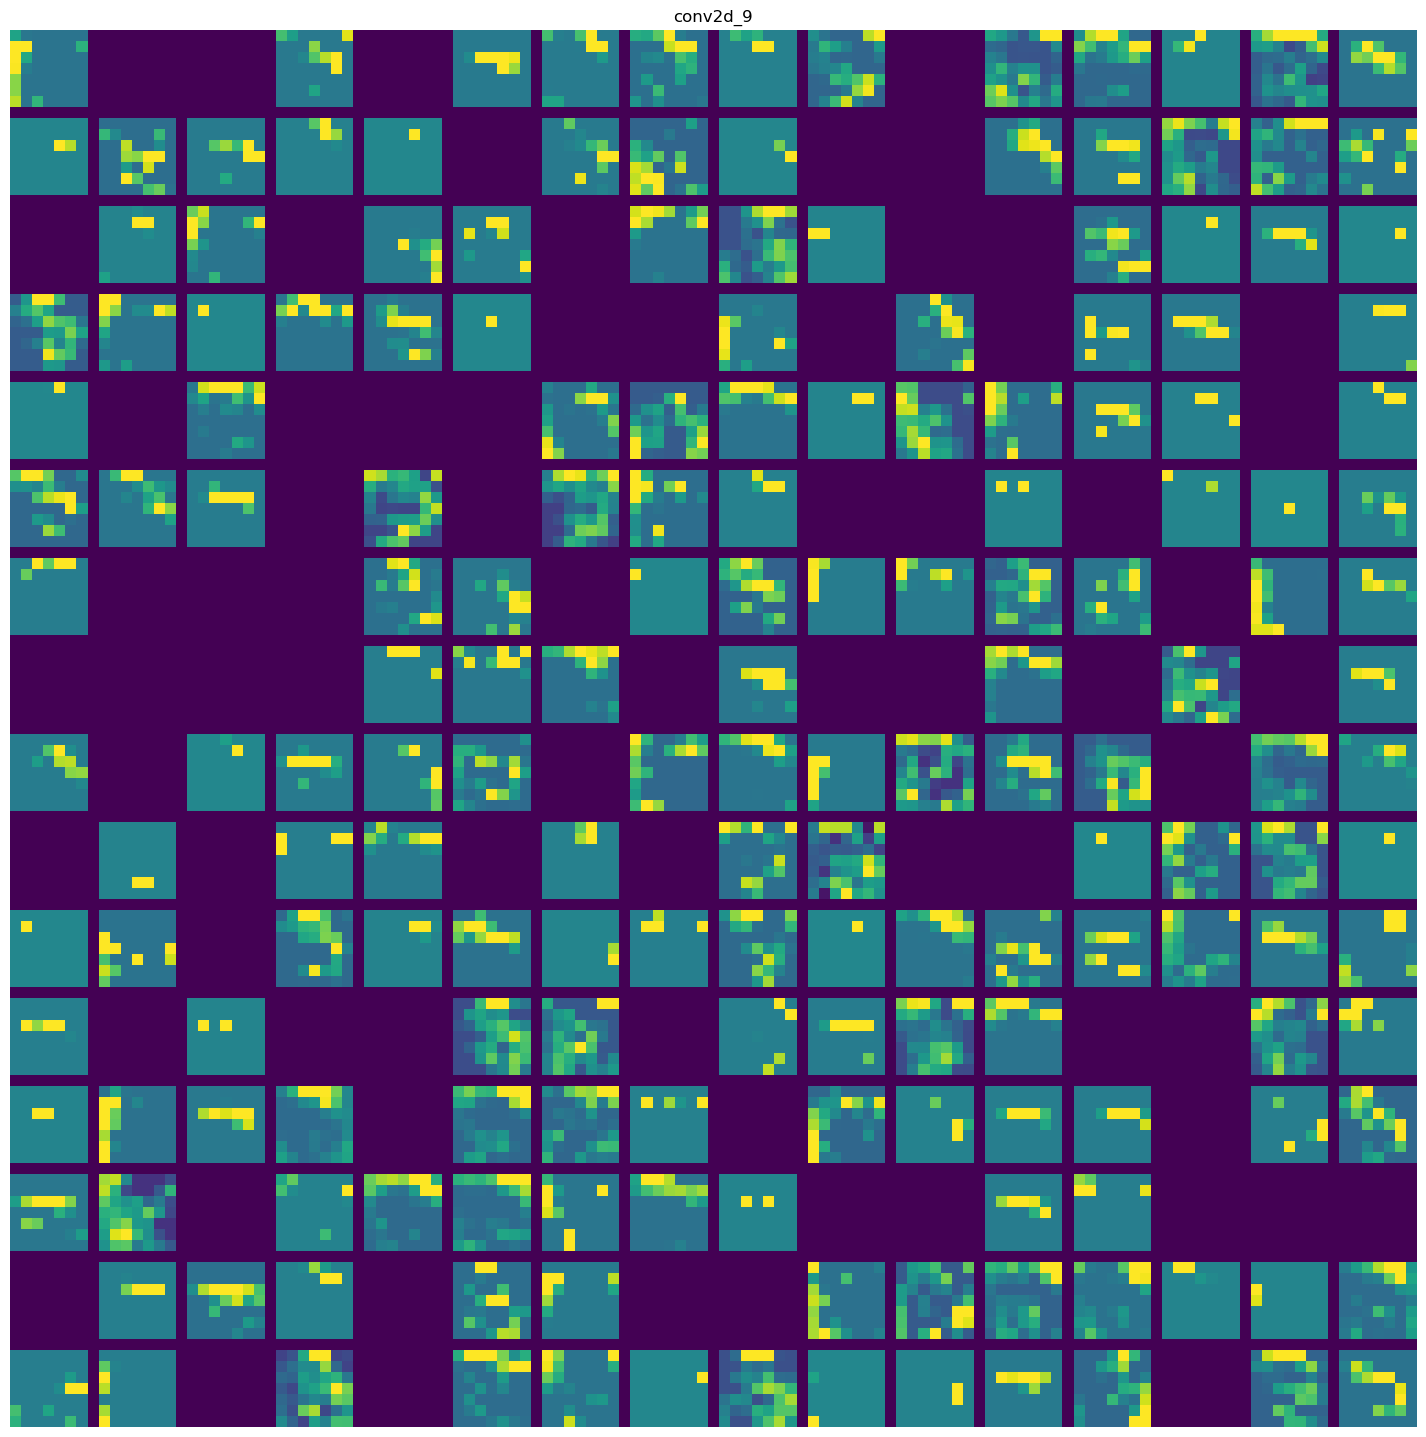

In [19]:
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols -1,
                            images_per_row * (size + 1) - 1))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0,:,:,channel_index].copy()
            if channel_image.sum() !=0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[
                col * (size + 1): (col+1) * size + col,
                row * (size + 1): (row+1) * size + row] = channel_image
    scale = 1./ size
    plt.figure(figsize = (scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis('off')
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')
            

# 서브넷 필터 시각화

In [13]:
model = keras.applications.xception.Xception(
    weights = 'imagenet',
    include_top = False)

In [14]:
for layer in model.layers:
    if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
        print(layer.name)

block1_conv1
block1_conv2
block2_sepconv1
block2_sepconv2
conv2d
block3_sepconv1
block3_sepconv2
conv2d_1
block4_sepconv1
block4_sepconv2
conv2d_2
block5_sepconv1
block5_sepconv2
block5_sepconv3
block6_sepconv1
block6_sepconv2
block6_sepconv3
block7_sepconv1
block7_sepconv2
block7_sepconv3
block8_sepconv1
block8_sepconv2
block8_sepconv3
block9_sepconv1
block9_sepconv2
block9_sepconv3
block10_sepconv1
block10_sepconv2
block10_sepconv3
block11_sepconv1
block11_sepconv2
block11_sepconv3
block12_sepconv1
block12_sepconv2
block12_sepconv3
block13_sepconv1
block13_sepconv2
conv2d_3
block14_sepconv1
block14_sepconv2


In [15]:
layer_name = 'block3_sepconv1'
layer = model.get_layer(name = layer_name)
feature_extractor = keras.Model(inputs = model.input, outputs = layer.output)

In [16]:
activation = feature_extractor(
    keras.applications.xception.preprocess_input(img_tensor)
)

In [17]:
activation

<tf.Tensor: shape=(1, 44, 44, 256), dtype=float32, numpy=
array([[[[-1.1589543 , -1.4908019 ,  2.0836298 , ..., -2.4759803 ,
          -1.6352215 , -2.3163943 ],
         [ 1.1923863 , -1.0723362 ,  1.8282073 , ..., -1.0571978 ,
          -1.7147713 , -3.0838752 ],
         [ 0.56663513, -1.2577841 ,  1.8884027 , ..., -1.444998  ,
          -1.9003268 , -2.8807564 ],
         ...,
         [ 0.9962226 , -0.41804102,  2.1393137 , ..., -0.65704924,
          -1.6827407 , -2.9763277 ],
         [ 1.3985502 , -0.21342102,  1.9052082 , ..., -0.66686827,
          -1.6932557 , -3.10706   ],
         [-0.8002901 , -0.62477636,  2.1805463 , ..., -0.00866459,
          -0.6500859 , -2.9367604 ]],

        [[-1.1892235 , -3.7429123 ,  1.179493  , ..., -6.7431684 ,
          -2.4804027 , -1.6937087 ],
         [ 3.0793188 , -3.7958229 ,  1.1353828 , ..., -4.5694222 ,
          -2.5641294 , -2.6236389 ],
         [ 1.7199497 , -2.8162017 ,  1.4690485 , ..., -4.303699  ,
          -2.5051332 , -2.9

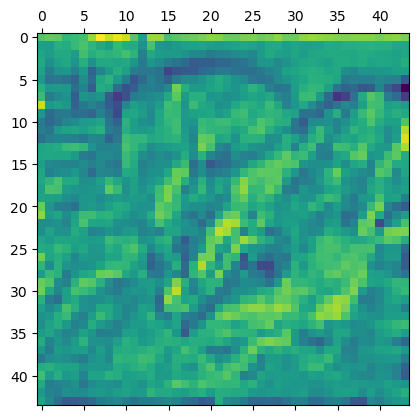

In [18]:
plt.matshow(activation[0,:,:,1], cmap = 'viridis')
plt.show()

In [25]:
import tensorflow as tf

def compute_loss(image, filter_index):
    activation = feature_extractor(image)
    filter_activation = activation[:,2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)

In [20]:
filter_activation = activation[:,2:-2, 2:-2,1]
rm = tf.reduce_mean(filter_activation)
rm
# 위 필터에서의 출력의 값을 평균한 것

<tf.Tensor: shape=(), dtype=float32, numpy=-3.8094664>

In [26]:
@tf.function
def gradient_ascent_step(image, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(image)
        #이미지 텐서의 텐서플로 변수 명시적으로 지정
        loss = compute_loss(image, filter_index)       
    grads = tape.gradient(loss, image)
    # 이미지에 대한 손실의 그레이디언트 계산
    # loss는 필터에 적용된 값의 출력의 평균, image는 원본 이미지  : image에 대한 loss의 미분값
    grads = tf.math.l2_normalize(grads)
    # 정규화를 통해서 수정량 크기 일정 범위 안에 놓는다
    image += learning_rate * grads
    # 이미지 손실 더욱 높아지도록 합한다 
    return image

In [27]:
img_width = 200
img_height = 200
def generate_filter_pattern(filter_index):
    iterations = 30
    learning_rate = 10
    image = tf.random.uniform(
    minval = 0.4,
    maxval = 0.6,
    shape = (1, img_width, img_height, 3))
    for i in range(iterations):
        image = gradient_ascent_step(image, filter_index, learning_rate)
    return image[0].numpy()

In [28]:
def deprocess_image(image):
    image -= image.mean()
    image /= image.std()
    image *= 64
    image += 128
    image = np.clip(image, 0, 255).astype('uint8')
    image = image[25:-25, 25:-25, :]
    return image

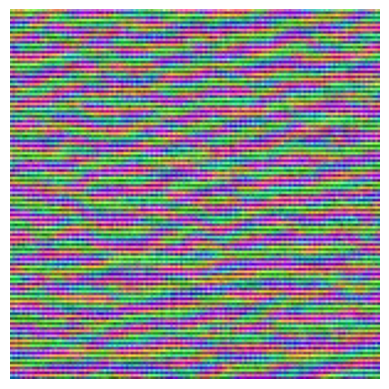

In [25]:
plt.axis('off')
plt.imshow(deprocess_image(generate_filter_pattern(filter_index = 2)))
plt.show()

In [26]:
all_images = []
for filter_index in range(64):
    print(f'{filter_index}번 필터 처리중')
    image = deprocess_image(
        generate_filter_pattern(filter_index))
    all_images.append(image)

margin = 5
n = 8
cropped_width  = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n-1) * margin
height = n * cropped_height + (n-1) * margin
stitched_filters = np.zeros((width, height, 3))

0번 필터 처리중
1번 필터 처리중
2번 필터 처리중
3번 필터 처리중
4번 필터 처리중
5번 필터 처리중
6번 필터 처리중
7번 필터 처리중
8번 필터 처리중
9번 필터 처리중
10번 필터 처리중
11번 필터 처리중
12번 필터 처리중
13번 필터 처리중
14번 필터 처리중
15번 필터 처리중
16번 필터 처리중
17번 필터 처리중
18번 필터 처리중
19번 필터 처리중
20번 필터 처리중
21번 필터 처리중
22번 필터 처리중
23번 필터 처리중
24번 필터 처리중
25번 필터 처리중
26번 필터 처리중
27번 필터 처리중
28번 필터 처리중
29번 필터 처리중
30번 필터 처리중
31번 필터 처리중
32번 필터 처리중
33번 필터 처리중
34번 필터 처리중
35번 필터 처리중
36번 필터 처리중
37번 필터 처리중
38번 필터 처리중
39번 필터 처리중
40번 필터 처리중
41번 필터 처리중
42번 필터 처리중
43번 필터 처리중
44번 필터 처리중
45번 필터 처리중
46번 필터 처리중
47번 필터 처리중
48번 필터 처리중
49번 필터 처리중
50번 필터 처리중
51번 필터 처리중
52번 필터 처리중
53번 필터 처리중
54번 필터 처리중
55번 필터 처리중
56번 필터 처리중
57번 필터 처리중
58번 필터 처리중
59번 필터 처리중
60번 필터 처리중
61번 필터 처리중
62번 필터 처리중
63번 필터 처리중


In [27]:
for i in range(n):
    for j in range(n):
        image = all_images[i * n + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j + cropped_height,
            :,
        ] = image

keras.utils.save_img(
    f'filters_for_layer_{layer_name}.png', stitched_filters)

# 컨브넷이 학습한 것 해석 ( 히트맵)

In [46]:
model = keras.applications.xception.Xception(
    weights = 'imagenet',
    include_top = True)

In [47]:
#img_path = keras.utils.get_file(
#    fname= 'elephantt.jpg',
#    origin = 'https://img-datasets.s3.amazonaws.com/elephant.jpg')
img_path = keras.utils.get_file(
    fname= 'cat.jpg',
    origin = 'https://img-datasets.s3.amazonaws.com/cat.jpg')

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(img_path, target_size = target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis = 0)
    array = keras.applications.xception.preprocess_input(array)
    return array

img_array = get_img_array(img_path, target_size = (299, 299))

In [48]:
def get_img_array(img_path, target_size):
    img = keras.utils.load_img(img_path, target_size = target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis = 0)
    array = keras.applications.xception.preprocess_input(array)
    return array

img_path = "C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/cats_vs_dogs_small_/train/dog/dog.8.jpg"
img_array = get_img_array(img_path, target_size = (299, 299))

In [49]:
preds = model.predict(img_array)
print(keras.applications.xception.decode_predictions(preds, top=3)[0])

1/1 [==============================] - 2s 2s/step
[('n02093428', 'American_Staffordshire_terrier', 0.43386167), ('n02093256', 'Staffordshire_bullterrier', 0.135805), ('n02099712', 'Labrador_retriever', 0.08154095)]


In [50]:
last_conv_layer_name = 'block14_sepconv2_act'
classifier_layer_names = [
    'avg_pool',
    'predictions',
]
last_conv_layer = model.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

In [51]:
classifier_input = keras.Input(shape = last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
    x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

In [52]:
with tf.GradientTape() as tape:
    last_conv_layer_output = last_conv_layer_model(img_array)
    tape.watch(last_conv_layer_output)
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]

grads = tape.gradient(top_class_channel, last_conv_layer_output)

In [53]:
pooled_grads = tf.reduce_mean(grads, axis = (0,1,2)).numpy()
last_conv_layer_output = last_conv_layer_output.numpy()[0]
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:,:,i] *= pooled_grads[i]

heatmap = np.mean(last_conv_layer_output, axis = -1)

In [54]:
pooled_grads.shape, grads.shape

((2048,), TensorShape([1, 10, 10, 2048]))

In [55]:
last_conv_layer_output.shape

(10, 10, 2048)

In [56]:
heatmap.shape

(10, 10)

In [58]:
heatmap

array([[-2.5697796e-08, -1.3451812e-08,  6.7518982e-08,  1.5390327e-07,
         2.3982750e-07,  2.7690655e-07,  6.1956442e-08,  1.6037589e-08,
         2.1092063e-08,  9.6789279e-09],
       [-9.6647064e-09,  3.7071949e-08,  1.9141791e-07,  5.0059396e-07,
         1.2945105e-06,  1.3192354e-06,  5.7860990e-07,  1.7404238e-07,
         6.5593355e-08,  1.8891821e-08],
       [ 3.8082369e-08,  3.1962634e-07,  1.5037035e-06,  4.6451223e-06,
         8.8898787e-06,  9.2944247e-06,  8.8558372e-06,  3.9945185e-06,
         8.2655038e-07,  2.3057130e-08],
       [-1.6719863e-08,  4.7216366e-07,  4.5415518e-06,  1.0486579e-05,
         1.9462432e-05,  1.9904463e-05,  1.9456933e-05,  1.2850083e-05,
         5.4880502e-06,  1.1602873e-06],
       [-3.8283069e-08,  6.8509689e-07,  7.6457918e-06,  1.6455961e-05,
         2.6843536e-05,  2.7390590e-05,  2.6047277e-05,  1.8424776e-05,
         8.5902921e-06,  2.0651073e-06],
       [-2.2073639e-08,  5.0993754e-07,  6.8131767e-06,  1.6067706e-05,
   

In [60]:
heatmap = np.maximum(heatmap,0)
heatmap.shape

(10, 10)

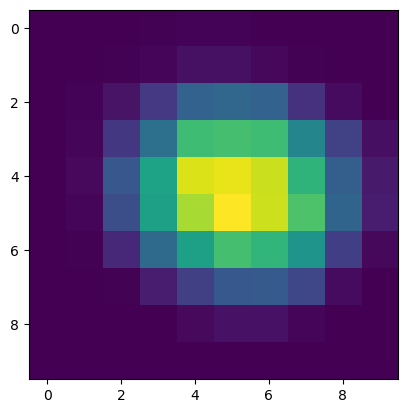

In [61]:
heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
plt.imshow(heatmap)
plt.show()

In [62]:
import matplotlib.cm as cm

img = keras.utils.load_img(img_path)
img = keras.utils.img_to_array(img)
heatmap = np.uint8(255 * heatmap)

jet = cm.get_cmap('jet')
jet_colors = jet(np.arange(256))[:,:3]
jet_heatmap = jet_colors[heatmap]

jet_heatmap = keras.utils.array_to_img(jet_heatmap)
jet_atmap.resize((iheatmap =jet_hemg.shape[1], img.shape[0]))
jet_heatmap = keras.utils.img_to_array(jet_heatmap)

C:\Users\procns\AppData\Local\Temp\ipykernel_19752\3799377306.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap('jet')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show(close=None, block=None)>

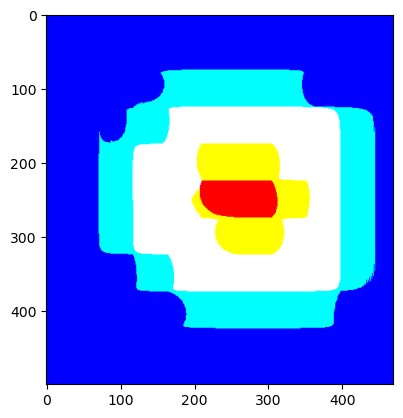

In [69]:
plt.imshow(jet_heatmap)
plt.show

In [75]:
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.utils.array_to_img(superimposed_img)

save_path = 'dog_cam.jpg'
#save_path = 'elephant_cam.jpg'
superimposed_img.save(save_path)

In [80]:
jet_heatmap = jet_heatmap * 0.4
jet_heatmap = keras.utils.array_to_img(jet_heatmap)

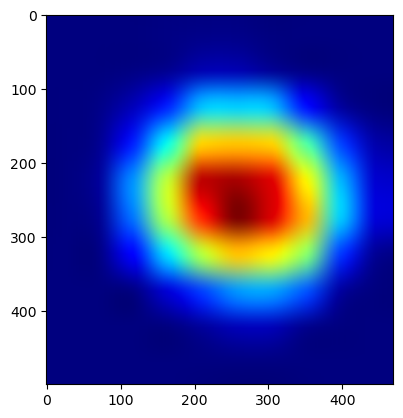

In [81]:
plt.imshow(jet_heatmap)
plt.show()

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)

x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

for size in [32, 64, 128, 256, 512]:
    residual = x

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    residual = layers.Conv2D(
        size, 1, strides=2, padding="same", use_bias=False)(residual)
    x = layers.add([x, residual])

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)